# <center><font color=navy>Data Science for Quantitative Finance</font></center>
## <center><font color=navy>Introduction to Statistical Dependence and Copulas for Finance</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 

### Readings:

1. ***Chapter 8***, [Financial Signal Processing and Machine Learning](https://ieeexplore.ieee.org/document/7471040) pdf file is available on Canvas

2. [Statistical Dependence: Beyond Pearson’s ρ ](https://projecteuclid.org/journals/statistical-science/volume-37/issue-1/Statistical-Dependence-Beyond-Pearsons-%CF%81/10.1214/21-STS823.full)

To many scientists and researchers, measuring dependence is synonymous with correlation and regression originated by Galton in 1888. However, in the 18th century over 100 years before Sir Francis Galton and Karl Pearson’s preoccupation with co-relation and correlation, various authors such as Thomas Bayes (in his 1763 paper) used verbal definitions of (in)dependence on occasion in their writings. 


###  $$\text{ “Anything that relies on correlation is charlatanism” (Nassim Taleb)}$$


#### Pearson’s correlation coefficient

The most common measure of correlation in stats is the Pearson Correlation. The full name is the Pearson Product Moment Correlation (PPMC). It shows the linear relationship between two sets of data. In simple terms, it answers the question, Can I draw a line graph to represent the data? Two letters are used to represent the Pearson correlation: Greek letter rho (ρ) for a population and the letter “r” for a sample.

$$r_{xy}=\frac{s_{xy}}{s_xs_y}$$

$s_{x}$ and $s_{y}$ are the sample standard deviations, and $s_{xy}$ is the sample covariance.

The explicit formula is

$$r_{xy}=\frac{n\Sigma x_iy_i-\Sigma x_i\Sigma y_i}{\sqrt{n\Sigma x_i^2-(\Sigma x_i)^2}\sqrt{n\Sigma y_i^2-(\Sigma y_i)^2})}$$



#### Limitations of the Pearson Correlation Coefficient:

1. Linearity

    a zero correlation does not necessarily imply independence of X and Y. Example: $Y = X^2$


2. Non-robustness with respect to data distribution

    only the first two moments are incorporated in the Pearson correlation coefficient and uncorrelatedness does not imply independence for some elliptical distributions or non-elliptical distributions. Pearson uncorrelatedness only implies independence if the joint distribution of the variables is normal.


3. Stationarity and Heteroskedasticity
    
    compute correlation on return series not on prices


4. Non-robustness with respect to outliers

    Pearson coefficient applies the mean as a measure for the central tendency.


5. Time frame sensitivity

    Pearson is static and Short-term correlation can be totally different from the long-term correlation. Correlations typically increase in economic recessions.


6. The correlation-causality fallacy

7. symmetric

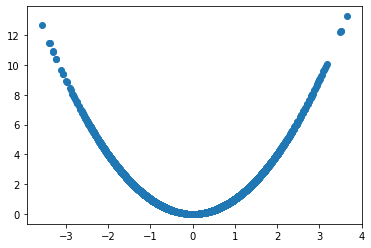

[[ 1.         -0.00952015]
 [-0.00952015  1.        ]]


In [50]:
x = pd.Series(np.random.randn(10000))
y = x**2
plt.scatter(x, y)
plt.show()
Pearson_rho = np.corrcoef(x, y)
print(Pearson_rho)

In [ ]:
!pip install yfinance

In [ ]:
!pip install missingno

In [1]:
import numpy as np
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import datetime
import random
import yfinance as yf

[*********************100%***********************]  2 of 2 completed


,BTC-USD,^GSPC
Date,,
2022-03-26,44500.828125,NaN
2022-03-27,46820.492188,NaN
2022-03-28,47128.003906,4575.520020
2022-03-29,47465.730469,4631.600098
2022-03-30,47062.664062,NaN


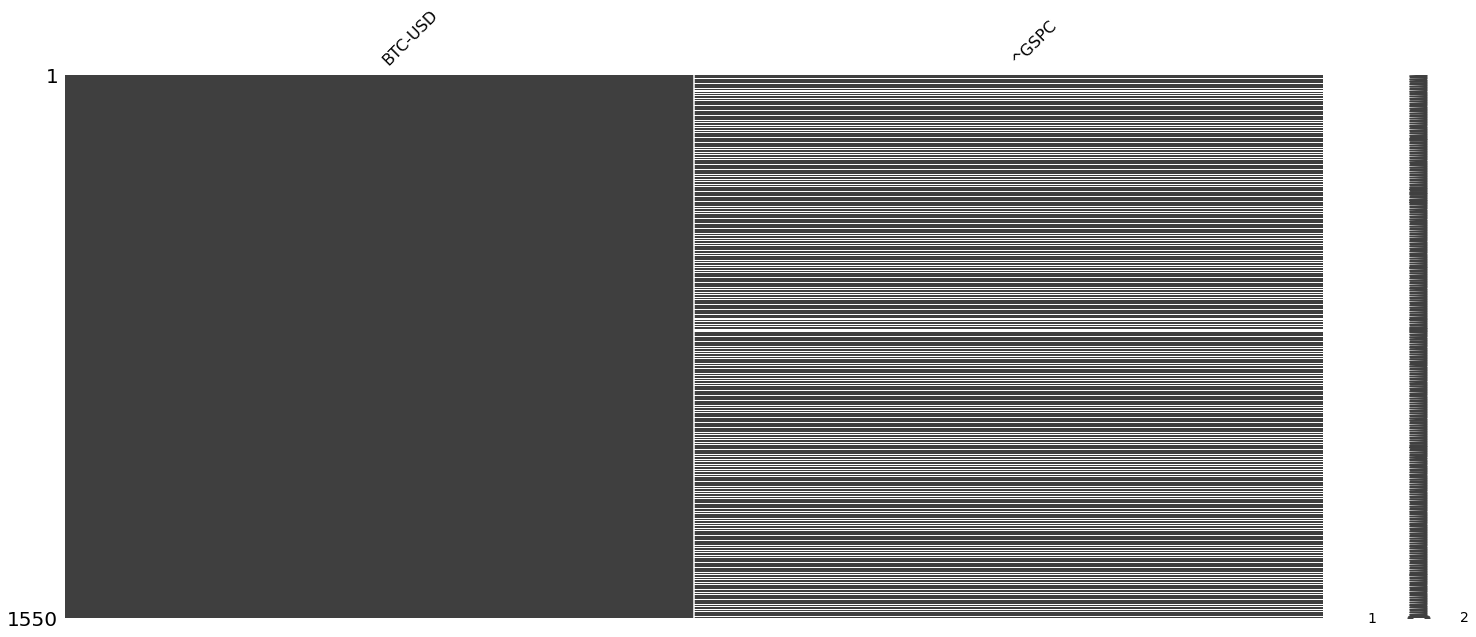

In [2]:
# Correlation and roaling correlation between S&P 500 Index and Bitcoin
sample = ['BTC-USD', '^GSPC']

Pr = yf.download(sample, start='2018-01-01', end='2022-03-30')['Adj Close']
msno.matrix(Pr)
Pr.tail()

<AxesSubplot:>

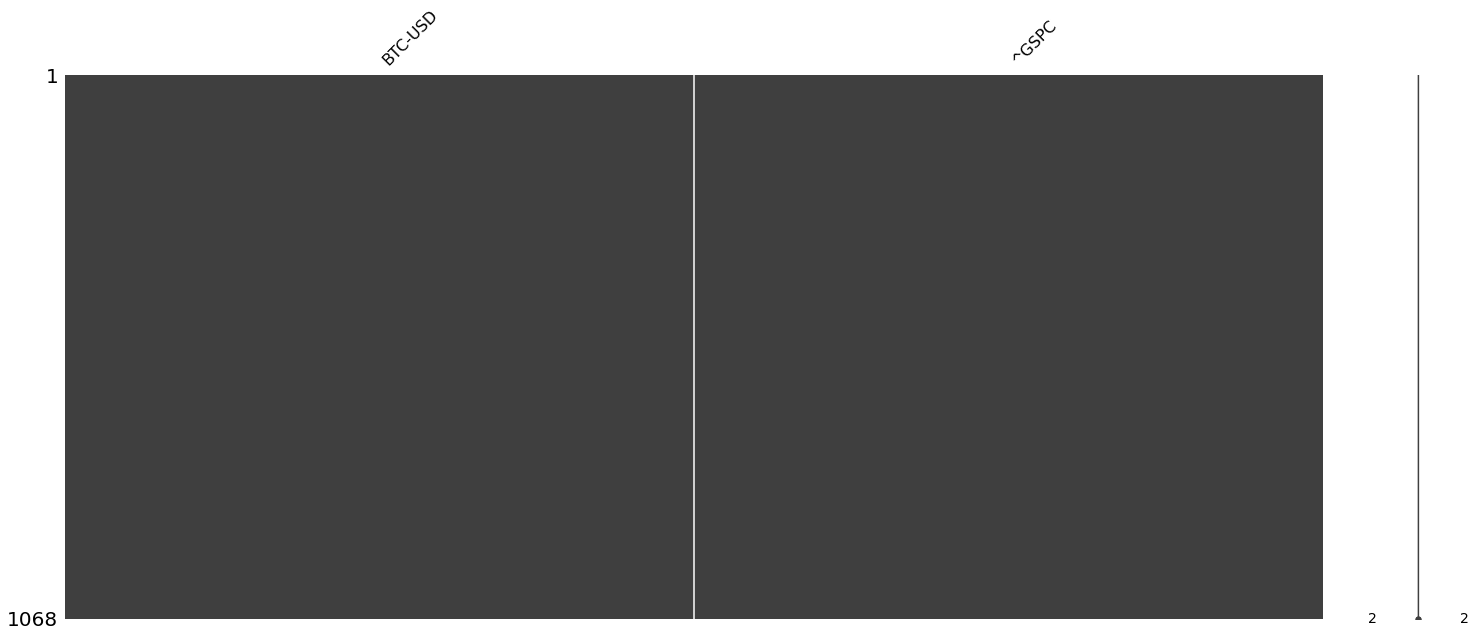

In [3]:
# Clean before calculating return values
cleaned_Pr = Pr.copy()

# Remove days (rows) with missing values for any of assets
cleaned_Pr.dropna(axis='index', how='any', inplace=True)

cleaned_Pr.tail()
msno.matrix(cleaned_Pr)

In [4]:
Re = np.log(cleaned_Pr) - np.log(cleaned_Pr.shift(1))
Re = Re[1:]
Re.tail(3)

,BTC-USD,^GSPC
Date,,
2022-03-25,0.008783,0.005053
2022-03-28,0.060783,0.007120
2022-03-29,0.007141,0.012182


<AxesSubplot:xlabel='Date'>

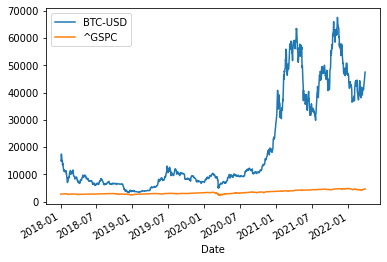

In [28]:
cleaned_Pr.plot()

<AxesSubplot:xlabel='Date'>

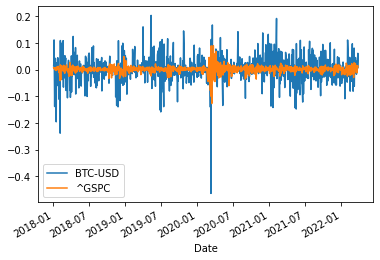

In [29]:
Re.plot()

In [53]:
# Pearson correlation for the entire data

s1 = pd.Series(Re['BTC-USD'].values)
s2 = pd.Series(Re['^GSPC'].values)
Pearson_rho = np.corrcoef(s1, s2)
print(Pearson_rho)

[[1.         0.24164016]
 [0.24164016 1.        ]]


0.16271877709550786
0.2207956763495446


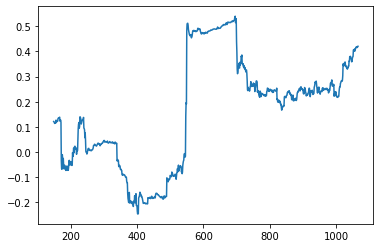

In [54]:
#Rolling correlations 

s1 = pd.Series(Re['BTC-USD'].values)
s2 = pd.Series(Re['^GSPC'].values)
n = 150
s1.rolling(n).corr(s2).plot()
print(s1.rolling(n).corr(s2).mean())
print(s1.rolling(n).corr(s2).std())

Confidence Interval:  [0.12691264 0.35713291]
Standard Error:  0.06


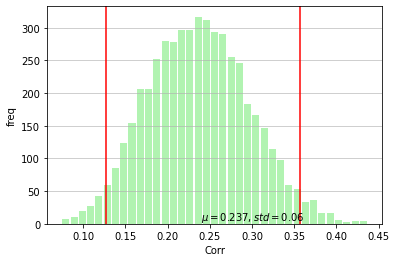

In [5]:
# Bootsrtaping (random resampling with replacement) to show the sensitivity of correlation to sample 
# and to test the significance of the correlation coefficient

Corr = []
for i in range(5000):
    data = Re.sample(n = len(Re), replace = True)
    Corr.append(data['BTC-USD'].corr(data['^GSPC'], method='pearson'))  # 'pearson' 'spearman' 'kendall'

confidence_interval = np.percentile(Corr,[2.5,97.5])
standard_error = np.round( np.std(Corr),3 )
print("Confidence Interval: ",confidence_interval)
print("Standard Error: ",standard_error)
plt.hist(x= Corr,bins='auto', color = 'lightgreen',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Corr')
plt.ylabel('freq')
plt.text(np.round(np.mean(Corr),2), 5,r'$\mu={}, std={}$'.format(np.round( np.mean(Corr),3 ),np.round( np.std(Corr),3 ) ))
plt.axvline(x=np.percentile(Corr,[2.5]), ymin=0, ymax=1,label=confidence_interval[0],c='r')
plt.axvline(x=np.percentile(Corr,[97.5]), ymin=0, ymax=1,label=confidence_interval[1],c='r')
plt.show()

### Copulas

In this section, we will discuss the basic framework of copula from the mathematical perspective and explain how to apply the approach in finance with an example of stock trading.

- The word **copula** is derived from the Latin noun for a link or a tie (as is the English word “couple”) and its purpose is to describe the dependence structure between two variables. 


- Sklar’s theorem states that “Any multivariate joint distribution can be written in terms of univariate marginal distribution functions and a copula which describes the dependence structure between the two variables”.


- Modeling multivariate probability distributions can be difficult when the marginal probability density functions of the component random variables are different. Copulas are a useful tool to model dependence between random variables with any marginal distributions.

To understand how a copula can describe the dependence function between random variables its helpful to first review some simple statistics. We'll focus specifically on continuous random variables.

### Probability Density Function (PDF)

A probability density function $f(x)$ captures the likelihood that a random sample from the distribution is equal to $x$. For example, the probability density function for the standard normal distribution is given by

\begin{equation}
f(x) = \frac{1}{2 \pi} e^{-x^2/2}
\end{equation}

Note that the probability density function does **not** return a probability but rather a "relative likelihood" which can take on values in the interval $[0, \infty)$; however, the integral over the probability density function from $-\infty$ to $\infty$ must be equal to one.

### Cumulative Distribution Function (CDF)

In many cases, the probability density function can be hard to work with directly. Instead, we will use the cumulative distribution function $F(x)$ which is defined as the integral of the probability density function

\begin{equation}
F(x) = \int_{-\infty}^x f(x)
\end{equation}

The below figure shows the probability density function $f(x)$ and the cumulative distribution function $F(x)$ for a normal standard distribution with mean $0.0$ and variance $1$.

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

def plot_cdf_pdf():
    # Generate 10000 evenly distributed values from -4 to 4
    x = np.linspace(-4.0, 4.0, 10000)

    # Compute their Probability Densities and Cumulative Distributions
    pdf = stats.norm.pdf(x)
    cdf = stats.norm.cdf(x)

    figure = plt.figure(figsize=(16, 4))
    figure.add_subplot(1, 2, 1)
    plt.plot(x, pdf)
    plt.title("Probability Density Function")
    plt.xlabel("x")
    plt.ylabel("f(x)")

    figure.add_subplot(1, 2, 2)
    plt.plot(x, cdf)
    plt.title("Cumulative Density Function")
    plt.xlabel("x")
    plt.ylabel("F(x)")

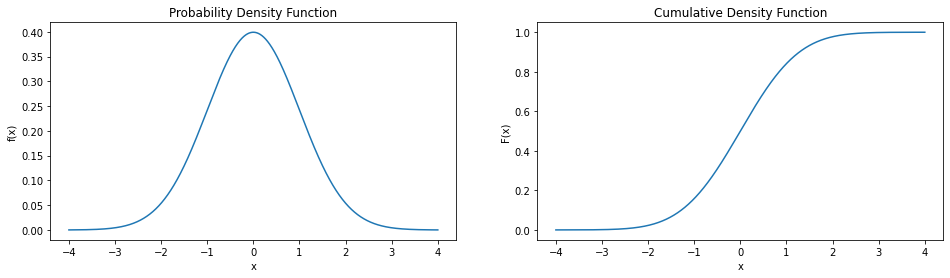

In [3]:
plot_cdf_pdf()

### Probability Integral Transform

The probability integral transform is a key component in our toolkit for working with probability distributions. Suppose we have a random variable $X$ that comes from a distribution with cumulative density function $F(X)$. Then, we can define a random variable $U$ as

\begin{equation}
U = F(X)
\end{equation}

and prove that $U$ follows a uniform distribution over the interval $[0.0, 1.0]$.

The figure below shows an example of this. We sample some data from a normal distribution and plot it on the left. Then, we use the CDF of the normal distribution to transform the data, plot it on the right, and observe that it resembles an uniform distribution.

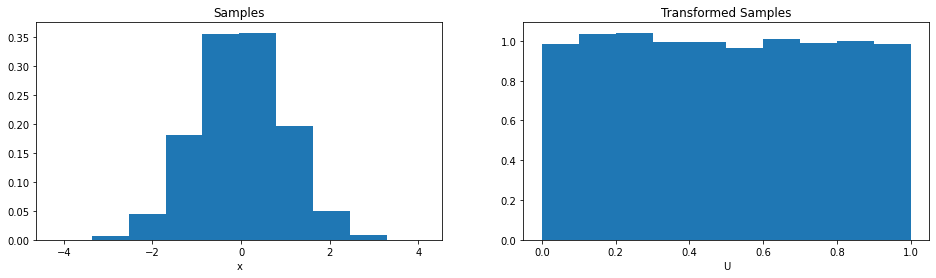

In [59]:
from scipy import stats
from matplotlib import pyplot as plt


X = stats.norm.rvs(size=10000)
X_pit = stats.norm.cdf(X)

fig = plt.figure(figsize=(16, 4))
fig.add_subplot(1, 2, 1)
plt.hist(X, density=True, bins=10)
plt.title("Samples") 
plt.xlabel("x")

fig.add_subplot(1, 2, 2)
plt.hist(X_pit, density=True, bins=10)
plt.title("Transformed Samples")
plt.xlabel("U")

plt.show()

## Framework of Bivariate Copulas



## \begin{equation}
Let:\\
X_1~ and ~X_2~ be ~RVs\\
U_1 ~=~ F(X_1);~~~ U_2 ~=~ F(X_2)\\
Then\\
U_1 \sim uniform\\
U_2 \sim uniform
\end{equation}

The above statements can be summarized as saying that the values of the CDF of any marginal distribution are uniformly distributed on the interval [0,1] ie. if you make a random draw from any distribution, you have the same probability of drawing the largest value (U=1) of that distribution as the smallest possible value (U=0) or the median value (U=.5).

So what does this have to do with copulas? A copula is actually a joint cumulative distribution function (CDFs) of the random variables $U$ it is modeling. Put formally:

A k dimensional copula is a function $c:[0,1]^k$ $\rightarrow [0,1]$ and is a CDF with uniform marginals $[1]$.

### \begin{equation}
Let:\\
U_1 ~=~ F(X_1);~~~ U_2 ~=~ F(X_2)\\
F(X_1,X_2) ~=~ P(X_1 \leq x_1 \cap X_2 \leq x_2) \\
~=~ P(F^-1(U_1) \leq x_1 \cap F^-1(U_2) \leq x_2)\\
~=~ P(U_1 \leq F(x_1) \cap U_2 \leq F(x_2))\\
~=~ P(U_1 \leq u_1 \cap U_2 \leq u_2) ~=~ C(U_1,U_2)
\end{equation}



Copulas function contains all the dependency characteristics of the marginal distributions and will better describe the linear and non-linear relationship between variables, using probability. They allow the marginal distributions to be modeled independently from each other, and no assumption on the joint behavior of the marginals is required.


- Taking the partial derivative of the copula function over U_1 and U_2 would give the conditional distribution function.
- There are many copula functions that enable us to describe dependence structures between variables, other than the Gaussian assumption. For instance the Clayton, Gumbel and Frank copula formulas from the Archimedean class. Archimedean copulas are based on the Laplace transforms φ of univariate distribution functions. 

## Trading Strategy based on Copula

In this section, we investigate using copula theory to identify trading opportunities. 

Stander Y, Marais D, Botha I. Trading strategies with copulas. Journal of Economic and Financial Sciences, 2013, 6(1): 83-107. https://journals.co.za/doi/pdf/10.10520/EJC135921

Typically the asset price distribution is modeled by a  Gaussian distribution of return series but the joint normal distribution may fail to catch some key features of the dependence of stock pairs' price like tail dependence. 

To determine which stock pairs to include in the analysis, correlations between pairs are analyzed using daily log stock price returns.  

- The Pearson correlation assumes that both variables should be normally distributed. Thus here we use Kendall rank as the correlation measure to choose the pairs.

In order to construct the copula, we need to transform the log-return series R1 and R2 to two uniformly distributed values U1 and U2. This can be done by estimating the marginal distribution functions of Rx
R1 and R2 and plugging the return values into a distribution function. As we make no assumptions about the distribution of the two log-return series, here we use the empirical distribution function to approach the marginal distribution F1(R1) and F2(R2). The Python ECDF function from the statsmodel library gives us the Empirical CDF as a step function.

Then, we estimate the copula parameter (i.e. theta for Archimedean copulas) by the relationship between the copula and the dependence measure Kendall’s tau.

The copula functions include all the information about the dependence structures of two return series. In Trading strategies with copulas, the fitted copula is used to derive the confidence bands for the conditional marginal distribution function of C(U1∣U2) and C(U2∣U1), that is the mispricing indexes. When the market observations fall outside the confidence band, it is an indication that pairs trading opportunity is available. 

Please also see "Copula for Pairs Trading: A Detailed, But Practical Introduction" for more details. 
https://hudsonthames.org/copula-for-pairs-trading-introduction/

For python code see: https://www.quantconnect.com/tutorials/strategy-library/pairs-trading-copula-vs-cointegration

## The Gaussian Copula and the Financial Crisis

In fact, Gaussian copulas are said to have played a key role in the 2007-2008 Financial Crisis as tail-correlations were severely underestimated. If you've seen The Big Short, the default rates of individual mortgages (among other things) inside CDOs are correlated -- if one mortgage fails, the likelihood of another failing is increased. In the early 2000s, the banks only knew how to model the marginals of the default rates. But we could  use copulas to model the correlations between those marginals. Rating agencies relied on this model heavily, severly underestimating risk and giving false ratings. 

Read this paper http://samueldwatts.com/wp-content/uploads/2016/08/Watts-Gaussian-Copula_Financial_Crisis.pdf for an excellent description of Gaussian copulas and the Financial Crisis which argues that different copula choices would not have made a difference but instead the assumed correlation was way too low.